In [2]:
import yfinance as yf

# Define the ticker symbol for Apple
ticker = "AAPL"

# Fetch data for the last 5 years
data = yf.download(ticker, period="5y")

# Display the first few rows
print(data)

# Check for null values in the dataset
print(data.isnull().sum())


data.info()

# # Save the data to a CSV file for future use
# data.to_csv("aapl_5_years.csv")

[*********************100%***********************]  1 of 1 completed

Price        Adj Close       Close        High         Low        Open  \
Ticker            AAPL        AAPL        AAPL        AAPL        AAPL   
Date                                                                     
2019-12-18   67.800743   69.934998   70.474998   69.779999   69.949997   
2019-12-19   67.868614   70.004997   70.294998   69.737503   69.875000   
2019-12-20   67.728027   69.860001   70.662498   69.639999   70.557503   
2019-12-23   68.833260   71.000000   71.062500   70.092499   70.132500   
2019-12-24   68.898689   71.067497   71.222504   70.730003   71.172501   
...                ...         ...         ...         ...         ...   
2024-12-12  247.960007  247.960007  248.740005  245.679993  246.889999   
2024-12-13  248.130005  248.130005  249.289993  246.240005  247.820007   
2024-12-16  251.039993  251.039993  251.380005  247.649994  247.990005   
2024-12-17  253.479996  253.479996  253.830002  249.779999  250.080002   
2024-12-18  252.830002  252.830002  25

In [3]:
clean_data = data[['Close']].copy()
clean_data.rename(columns={'Close': 'Price'}, inplace=True)

clean_data.head()

clean_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1259 entries, 2019-12-18 to 2024-12-18
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   (Price, AAPL)  1259 non-null   float64
dtypes: float64(1)
memory usage: 19.7 KB


In [4]:

# 6. Feature Engineering
clean_data['MA_7'] = clean_data['Price'].rolling(window=7).mean()
clean_data['MA_21'] = clean_data['Price'].rolling(window=21).mean()


# 7. Inspect Data with Features
print("\nData with Features:\n", clean_data.head(25))



Data with Features:
 Price           Price       MA_7      MA_21
Ticker           AAPL                      
Date                                       
2019-12-18  69.934998        NaN        NaN
2019-12-19  70.004997        NaN        NaN
2019-12-20  69.860001        NaN        NaN
2019-12-23  71.000000        NaN        NaN
2019-12-24  71.067497        NaN        NaN
2019-12-26  72.477501        NaN        NaN
2019-12-27  72.449997  70.970713        NaN
2019-12-30  72.879997  71.391427        NaN
2019-12-31  73.412498  71.878213        NaN
2020-01-02  75.087502  72.624999        NaN
2020-01-03  74.357498  73.104642        NaN
2020-01-06  74.949997  73.659284        NaN
2020-01-07  74.597504  73.962142        NaN
2020-01-08  75.797501  74.440357        NaN
2020-01-09  77.407501  75.087143        NaN
2020-01-10  77.582497  75.682857        NaN
2020-01-13  79.239998  76.276071        NaN
2020-01-14  78.169998  76.820714        NaN
2020-01-15  77.834999  77.232857        NaN
2020-01-16

In [5]:
# 7. Drop NaN values
clean_data.dropna(inplace=True)

# 8. Inspect Cleaned Data
print("\nCleaned Data Header after NaN removal:\n", clean_data.head(10))



Cleaned Data Header after NaN removal:
 Price           Price       MA_7      MA_21
Ticker           AAPL                      
Date                                       
2020-01-17  79.682503  78.389642  74.600237
2020-01-21  79.142502  78.637499  75.038690
2020-01-22  79.425003  78.900714  75.487261
2020-01-23  79.807503  78.981786  75.960952
2020-01-24  79.577499  79.182858  76.369404
2020-01-27  77.237503  79.097501  76.663214
2020-01-28  79.422501  79.185002  76.993928
2020-01-29  81.084999  79.385359  77.405119
2020-01-30  80.967499  79.646072  77.790238
2020-01-31  77.377502  79.353572  77.979048


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 8. Create Target variable
clean_data['Price_Change'] = clean_data['Price'].diff().shift(-1)  # Price difference with next day
clean_data['Target'] = (clean_data['Price_Change'] > 0).astype(int) # 1 = up, 0 = down or same
clean_data.dropna(inplace=True)  # Drop last row that has NaNs as well

# 9. Define features and Target
features = ['MA_7', 'MA_21']
target = 'Target'

# 10. Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(clean_data[features], clean_data[target], test_size=0.1, random_state=42)

# 11. Create Model
model = DecisionTreeClassifier(random_state=42)

# 12. Train Model
model.fit(X_train, y_train)

# 13. Make Predictions
y_pred = model.predict(X_test)

# 14. Evaluate Model
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)



Accuracy: 0.5



Accuracy: 0.5
Precision: 0.6
Recall: 0.5526315789473685
F1 Score: 0.5753424657534246

Classification Report:
               precision    recall  f1-score   support

           0       0.37      0.42      0.39        48
           1       0.60      0.55      0.58        76

    accuracy                           0.50       124
   macro avg       0.49      0.48      0.48       124
weighted avg       0.51      0.50      0.50       124



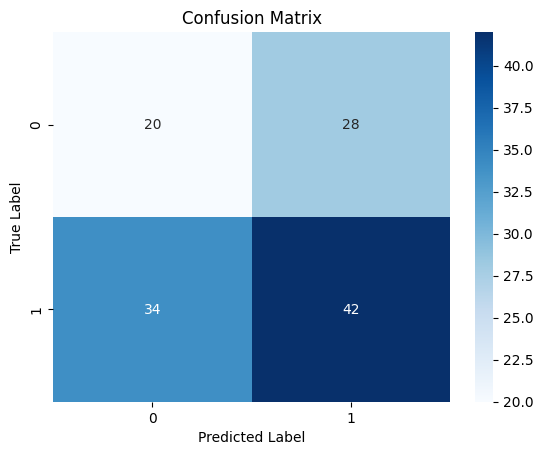

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


# 14. Evaluate Model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("\nAccuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# 15. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

